# Forecasting

Data source : https://ourworldindata.org/grapher/air-passengers-carried

## Imports

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def unique(liste):
    
    unique = []

    for e in liste:
        if e not in unique:
            unique.append(e)
            
    return unique


def load_data(filepath, country):

    Entity=[]
    Code = []
    Year=[]
    Passengers=[]


    with open(filepath, newline='') as file:

        filereader = csv.reader(file, delimiter=',', quotechar='"')

        for row in filereader:

            if row[1] == country :
            
                Entity.append(row[0])
                Code.append(row[1])
                Year.append(row[2])
                Passengers.append(row[3])
                
    return Entity, Code, Year, Passengers

## Variables

In [3]:

Entity_fra, Code_fra, Year_fra, Passengers_fra = load_data(filepath='data_input/air-passengers-carried.csv', country='FRA')
Entity_usa, Code_usa, Year_usa, Passengers_usa = load_data(filepath='data_input/air-passengers-carried.csv', country='USA')

data_fra = zip(Year_fra, Passengers_fra)
data_usa = zip(Year_usa, Passengers_usa)

print(Entity_fra[:1], Entity_fra[-1:])
print(Code_fra[:1], Code_fra[-1:])
print(Year_fra[:1], Year_fra[-1:])
print(Passengers_fra[:1], Passengers_fra[-1:])


['France'] ['France']
['FRA'] ['FRA']
['1970'] ['2021']
['9108000'] ['32000528']


## Linear regression

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
pass_fra = np.array(Passengers_fra, dtype='int').reshape(-1, 1)
year_fra = np.array(Year_fra, dtype='int').reshape(-1, 1)
pass_usa = np.array(Passengers_usa, dtype='int').reshape(-1, 1)
year_usa = np.array(Year_usa, dtype='int').reshape(-1, 1)

In [6]:
lr = LinearRegression().fit(year_fra, pass_fra,)

r_sq = lr.score(year_fra, pass_fra)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {lr.intercept_}")

print(f"slope: {lr.coef_}")

y_pred = lr.predict(year_fra)
print(f"predicted response:\n{y_pred[:5]}")

coefficient of determination: 0.7987817361077296
intercept: [-2.23769636e+09]
slope: [[1140927.49304192]]
predicted response:
[[ 9930805.08127737]
 [11071732.57431936]
 [12212660.06736135]
 [13353587.56040335]
 [14494515.05344486]]


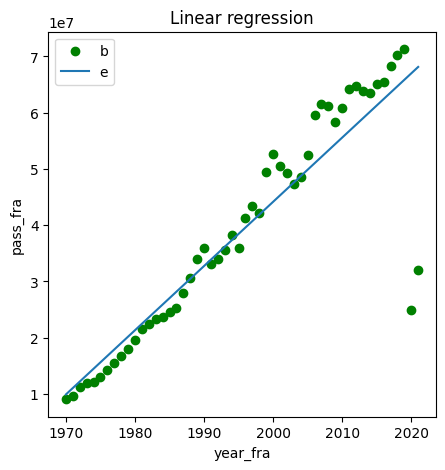

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(year_fra, pass_fra, label='raw data', color='g')
ax.plot(year_fra, y_pred, label='regression')
ax.set_xlabel('year_fra')
ax.set_ylabel('pass_fra')

ax.legend('best')
plt.title("Linear regression")
plt.savefig('example_LinearRegresion.png');

### With Sklearn (Simple)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
Entity_fra, Code_fra, Year_fra, Passengers_fra = load_data(filepath='data_input/air-passengers-carried.csv', country='FRA')

x = np.array(Year_fra, dtype='int').reshape(-1, 1)
y = np.array(Passengers_fra, dtype='int').reshape(-1, 1)

print(len(x))
print(x.min(), x.max())

52
1970 2021


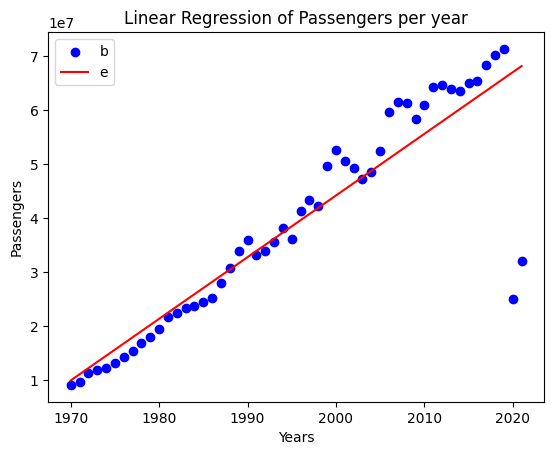

In [10]:
lr1 = LinearRegression()
 
lr1.fit(x, y)
coef = lr1.coef_
intercept = lr1.intercept_
y_pred = [(year * coef + intercept) for year in x]
y_pred = np.array(y_pred).reshape(-1, 1)

plt.scatter(x, y, color='blue', label='data points')
plt.plot(x, y_pred, color='red', label='regression')

plt.title('Linear Regression of Passengers per year')
plt.xlabel('Years')
plt.ylabel('Passengers')
plt.legend('best')
 
plt.show();

### With Sklearn (standard)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
Entity_fra, Code_fra, Year_fra, Passengers_fra = load_data(filepath='data_input/air-passengers-carried.csv', country='FRA')

x = np.array(Year_fra, dtype='int').reshape(-1, 1)
y = np.array(Passengers_fra, dtype='int').reshape(-1, 1)

threshold = int(len(x)*0.8)
x_train = x[:threshold]
x_test = x[threshold:]
y_train = y[:threshold]
y_test = y[threshold:]


Mean squared error: 400574543736622.19
Coefficient of determination: -0.81


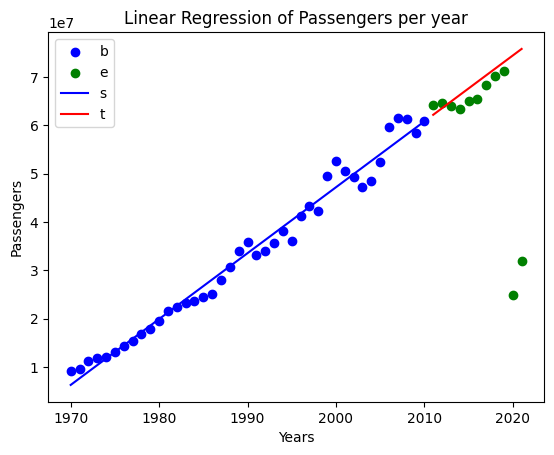

In [13]:
lr2 = LinearRegression()
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)

coef = lr2.coef_
intercept = lr2.intercept_
lr_train = [(year * coef + intercept) for year in x_train]
lr_train = np.array(lr_train).reshape(-1, 1)

plt.scatter(x_train, y_train, color='blue', label='train set')
plt.scatter(x_test, y_test, color='green', label='test set')
plt.plot(x_train, lr_train, color='blue', label='LR train')
plt.plot(x_test, y_pred, color='red', label='Prediction')

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


plt.title('Linear Regression of Passengers per year')
plt.xlabel('Years')
plt.ylabel('Passengers')
plt.legend('best')
 
plt.show();